In [1]:
'''Import basic modules.'''
import pandas as pd
import numpy as np


'''Customize visualization
Seaborn and matplotlib visualization.'''
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
import folium 
from IPython.core.display import HTML
import urllib.request
from PIL import Image
from wordcloud import WordCloud ,STOPWORDS


'''Plotly visualization .'''
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

import warnings
warnings.filterwarnings('ignore')

In [2]:
complete = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv', 
                         parse_dates=['Date'])
complete.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [3]:
indonesia = complete[complete['Country/Region'] == 'Indonesia']
display(indonesia.head(3))
display(indonesia.tail(3))
display(indonesia.shape)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
132,NaN,Indonesia,-0.7893,113.9213,2020-01-22,0,0,0
397,NaN,Indonesia,-0.7893,113.9213,2020-01-23,0,0,0
662,NaN,Indonesia,-0.7893,113.9213,2020-01-24,0,0,0


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32462,NaN,Indonesia,-0.7893,113.9213,2020-05-23,21745,1351,5249
32727,NaN,Indonesia,-0.7893,113.9213,2020-05-24,22271,1372,5402
32992,NaN,Indonesia,-0.7893,113.9213,2020-05-25,22750,1391,5642


(125, 8)

In [4]:
# Defining COVID-19 cases as per classifications 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Defining Active Case: Active Case = confirmed - deaths - recovered
complete['Active'] = complete['Confirmed'] - complete['Deaths'] - complete['Recovered']

# latest
full_latest = complete[complete['Date'] == max(complete['Date'])].reset_index()

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

In [26]:
confirmed = full_latest_grouped.sum().Confirmed
deaths =  full_latest_grouped.sum().Deaths
recovered =  full_latest_grouped.sum().Recovered
active =  full_latest_grouped.sum().Active
row = [temp.iloc[-1,].Date,confirmed,deaths,recovered,active]
latest = pd.DataFrame([row], columns = full_latest_grouped.columns)
latest.style.background_gradient(cmap='Blues')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-05-25 00:00:00,5495055,346232,2174434,2974389


In [27]:
temp = complete.groupby('Date')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
temp.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,35,880
3,2020-01-25,1434,42,38,1354
4,2020-01-26,2118,56,51,2011


In [37]:
temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_f = temp_f.reset_index(drop=True)
temp_f = temp_f.iloc[:50]
temp_f.head().style.background_gradient(cmap='Blues')

,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,1662302,98220,379157,1184925
1,Brazil,374898,23473,153833,197592
2,Russia,353427,3633,118798,230996
3,United Kingdom,262547,36996,1161,224390
4,Spain,235400,26834,150376,58190


In [38]:
print('The most cases are confirmed:',temp_f.Confirmed.max())
print('The fewest cases are confirmed:',temp_f.Confirmed.min())

The most cases are confirmed: 1662302
The fewest cases are confirmed: 9171


In [39]:
temp.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,35,880
3,2020-01-25,1434,42,38,1354
4,2020-01-26,2118,56,51,2011


In [40]:
ratio_r = list()
ratio_d = list()
for i in range(len(temp_f)):
    ratio_r.append(temp_f.iloc[i,3]/temp_f.iloc[i,1])
    ratio_d.append(temp_f.iloc[i,2]/temp_f.iloc[i,1])
temp_f['Ratio_Recovered'] = ratio_r
temp_f['Ratio_Deaths'] = ratio_d

In [41]:
# temp_f = full_latest_grouped.sort_values(by='Confirmed', ascending=False)
temp_ff = temp_f.sort_values(by='Ratio_Deaths', ascending=False)
temp_bb = temp_f.sort_values(by='Ratio_Recovered', ascending=False)
display(temp_ff.iloc[:10,].style.background_gradient(cmap='Blues'))
display(temp_bb.iloc[:10,].style.background_gradient(cmap='Blues'))


,Country/Region,Confirmed,Deaths,Recovered,Active,Ratio_Recovered,Ratio_Deaths
17,Belgium,57342,9312,15297,32733,0.266768,0.162394
6,France,183067,28460,65317,89290,0.356793,0.155462
5,Italy,230158,32877,141981,55300,0.616885,0.142845
3,United Kingdom,262547,36996,1161,224390,0.004422,0.140912
19,Netherlands,45641,5849,168,39624,0.003681,0.128152
24,Sweden,33843,4029,4971,24843,0.146884,0.119050
4,Spain,235400,26834,150376,58190,0.638811,0.113993
16,Mexico,71105,7633,49452,14020,0.695479,0.107348
21,Ecuador,37355,3203,18003,16149,0.481944,0.085745
12,Canada,87119,6655,0,80464,0.000000,0.076390


,Country/Region,Confirmed,Deaths,Recovered,Active,Ratio_Recovered,Ratio_Deaths
27,Switzerland,30746,1913,28200,633,0.917192,0.062219
45,South Korea,11225,269,10275,681,0.915367,0.023964
40,Austria,16539,641,15138,760,0.915291,0.038757
13,China,84102,4638,76331,3133,0.907600,0.055147
7,Germany,180600,8309,161199,11092,0.892575,0.046008
44,Denmark,11586,563,10162,861,0.877093,0.048593
38,Israel,16734,281,14307,2146,0.854966,0.016792
29,Ireland,24698,1606,21060,2032,0.852701,0.065026
39,Japan,16581,830,13612,2139,0.820940,0.050057
10,Iran,137724,7451,107713,22560,0.782093,0.054101


In [50]:
fig = px.bar(temp_f.sort_values('Ratio_Deaths', ascending=False).head(15), 
             y="Ratio_Deaths", x="Country/Region", color= "Country/Region",
             title='Top 15 Ratio_Deaths', 
             orientation='v',
             color_discrete_sequence = px.colors.cyclical.IceFire,
             width=700, height=600)
fig.update_traces(opacity=0.8)

fig.update_layout(template = 'plotly_white')
fig.show()

In [49]:
fig = px.bar(temp_f.sort_values('Ratio_Recovered', ascending=False).head(15), 
             y="Ratio_Recovered", x="Country/Region", color= "Country/Region",
             title='Top 15 Ratio_Recovered', 
             orientation='v',
             color_discrete_sequence = px.colors.cyclical.IceFire,
             width=700, height=600)
fig.update_traces(opacity=0.8)

fig.update_layout(template = 'plotly_white')
fig.show()

In [51]:
temp_f['Best_Ratio'] = temp_f['Ratio_Recovered'] - temp_f['Ratio_Deaths']

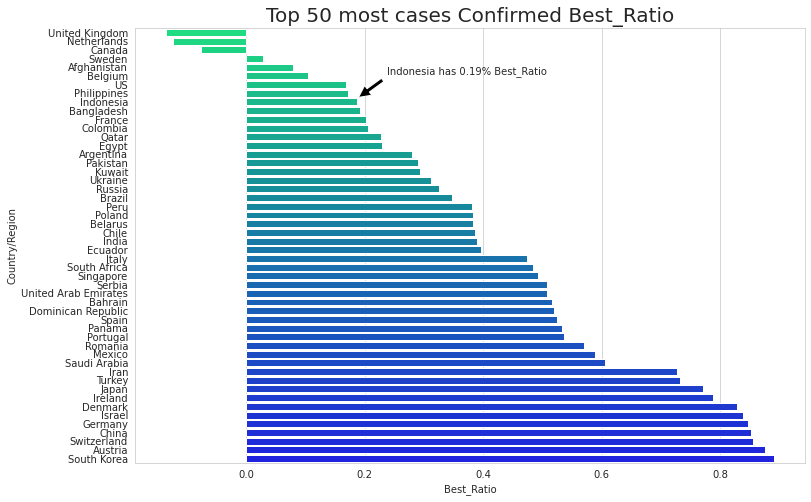

In [52]:
fig,axes = plt.subplots(1,1, figsize=(12,8))

sns.barplot(x='Best_Ratio', y='Country/Region', data=temp_f.sort_values(by='Best_Ratio'), palette='winter_r',ax=axes)
for i,p in enumerate(axes.patches):
    if i == 8:
        height = p.get_height()
        axes.annotate('Indonesia has {:.2f}% Best_Ratio '.format(p.get_width()),xy = (p.get_width(),p.get_xy()[1]),xytext = (p.get_x()+ p.get_width()+0.05, height+4),
                      arrowprops = dict(facecolor='black',shrink=0.05))
        
        
plt.title('Top 50 most cases Confirmed Best_Ratio', fontsize=20)
plt.show()

There are 3 countries that have a negative ratio, namely United Kingdom (-0.13%), Netherlands (-0.12%), Canada (-0.07). This means that the number of deaths in these 3 countries is greater than the number who are recovered.

And the most Best_Ratio are Switzerland (0.85%), Austria (0.87%), and South Korea (0.89%). This means that these 3 countries almost full recovered!

## Temperature
This dataset I collected from [Wikipedia](https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature) using beautiful soup. If you want to see my notebook, you can check [here](https://www.kaggle.com/efradgamer/temperature-scrapping-from-wikipedia-2020).

In [86]:
world_temp_2020 = pd.read_csv('/kaggle/input/world-average-temperature/Avg_World_Temp_2020.csv')
Continent = world_temp_2020.Continent

In [87]:
world_temp_2020 = world_temp_2020.iloc[:,:-9].drop('Unnamed: 0', axis=1)
world_temp_2020.drop('City',axis=1,inplace=True)

In [88]:
world_temp_2020['Avg_temp'] = world_temp_2020.groupby('Country').transform(lambda x: x.mean()).mean(axis=1)
world_temp_2020['Continent'] = Continent

In [89]:
world_temp_2020.head()

,Country,Jan,Feb,Mar,Apr,May,Avg_temp,Continent
0,Algeria,11.2,11.9,12.8,14.7,17.7,18.660000,Africa
1,Algeria,12.8,15.0,18.1,22.2,26.1,18.660000,Africa
2,Algeria,16.0,18.2,23.1,27.9,32.2,18.660000,Africa
3,Angola,26.7,28.5,28.6,28.2,27.0,27.800000,Africa
4,Benin,27.3,28.5,28.9,28.6,27.8,28.566667,Africa


In [90]:
Country = full_latest_grouped[full_latest_grouped['Country/Region'].isin(world_temp_2020['Country'])]
Country['Country'] = Country['Country/Region']

In [92]:
full = pd.merge(Country, world_temp_2020, on='Country', how='left')
full.drop(columns = ['Country/Region','Jan','Feb','Mar','Apr','May'],inplace=True)

In [93]:
world_temp_2020.head()

,Country,Jan,Feb,Mar,Apr,May,Avg_temp,Continent
0,Algeria,11.2,11.9,12.8,14.7,17.7,18.660000,Africa
1,Algeria,12.8,15.0,18.1,22.2,26.1,18.660000,Africa
2,Algeria,16.0,18.2,23.1,27.9,32.2,18.660000,Africa
3,Angola,26.7,28.5,28.6,28.2,27.0,27.800000,Africa
4,Benin,27.3,28.5,28.9,28.6,27.8,28.566667,Africa


In [94]:
full.head()

,Confirmed,Deaths,Recovered,Active,Country,Avg_temp,Continent
0,11173,219,1097,9857,Afghanistan,6.68,Asia
1,1004,32,795,177,Albania,11.18,Europe
2,8503,609,4747,3147,Algeria,18.66,Africa
3,8503,609,4747,3147,Algeria,18.66,Africa
4,8503,609,4747,3147,Algeria,18.66,Africa


In [95]:
africa_temp = full[full['Continent'] == 'Africa']
asia_temp = full[full['Continent'] == 'Asia']
europe_temp = full[full['Continent'] == 'Europe']
na_temp = full[full['Continent'] == 'North America']
ocenia_temp = full[full['Continent'] == 'Oceania']
sa_temp = full[full['Continent'] == 'South America']

## Asia

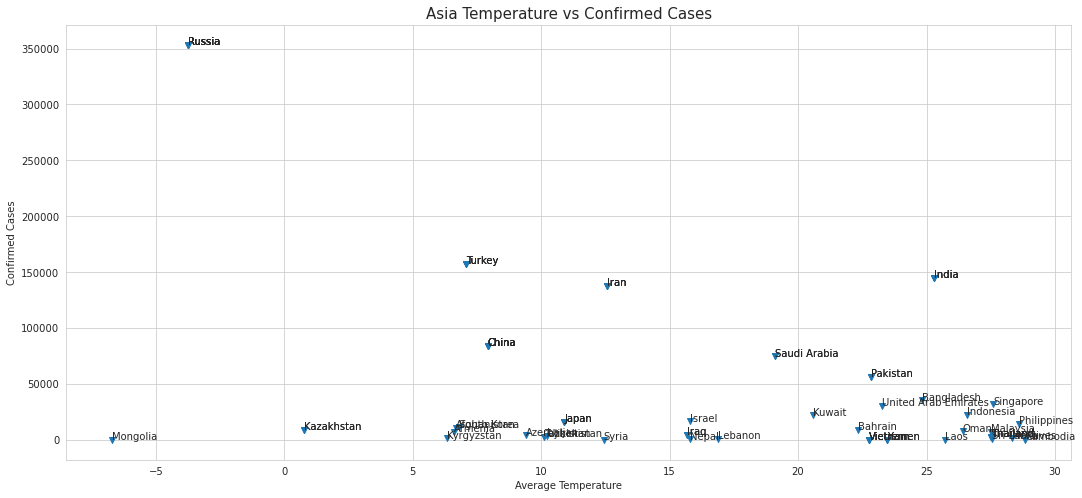

In [96]:
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(asia_temp['Avg_temp'], asia_temp['Confirmed'], marker='v')
plt.xlabel('Average Temperature')
plt.ylabel('Confirmed Cases')
plt.title('Asia Temperature vs Confirmed Cases', fontsize=15)
for i, txt in zip(asia_temp.index,asia_temp.Country):
    ax.annotate(txt, (asia_temp['Avg_temp'][i], asia_temp['Confirmed'][i]),fontsize=10)

## Africa

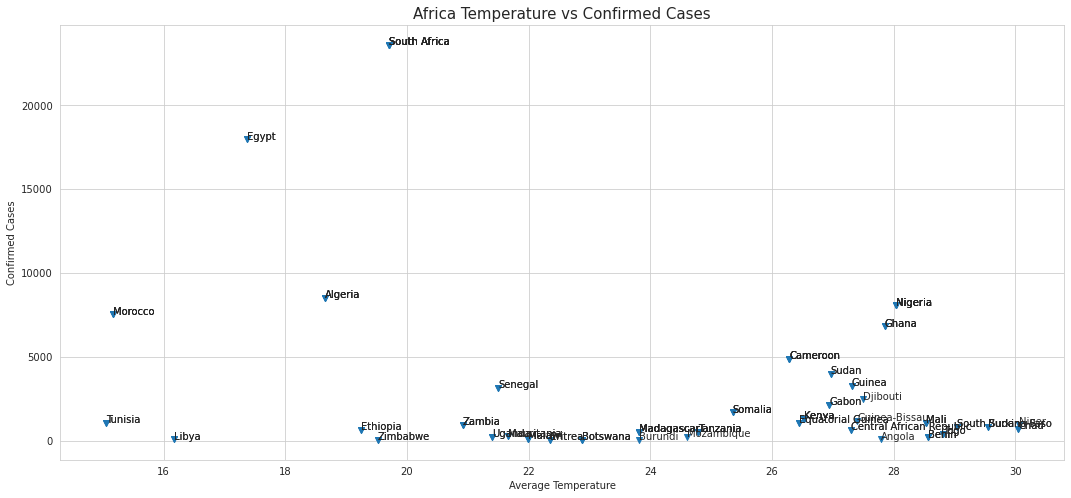

In [97]:
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(africa_temp['Avg_temp'], africa_temp['Confirmed'], marker='v')
plt.xlabel('Average Temperature')
plt.ylabel('Confirmed Cases')
plt.title('Africa Temperature vs Confirmed Cases', fontsize=15)
for i, txt in zip(africa_temp.index,africa_temp.Country):
    ax.annotate(txt, (africa_temp['Avg_temp'][i], africa_temp['Confirmed'][i]),fontsize=10)

## Europe

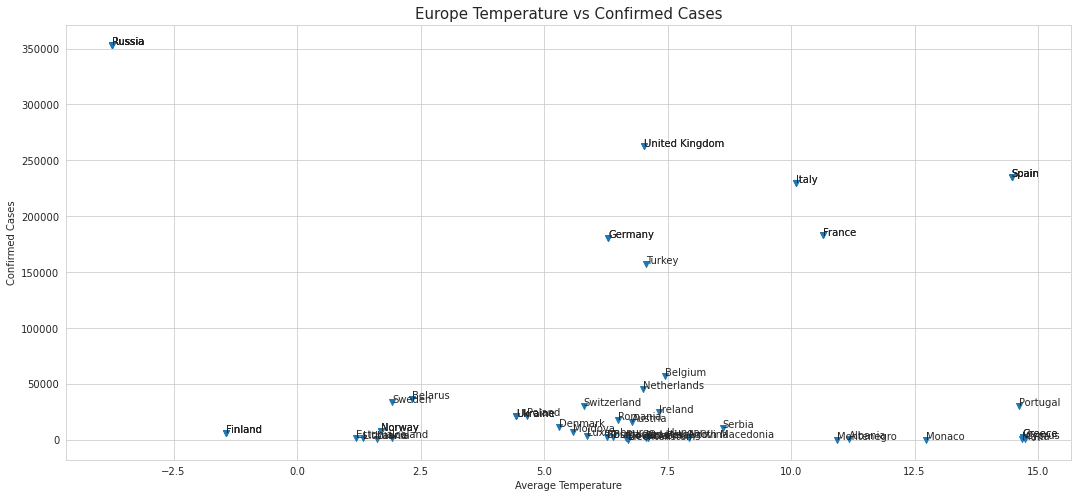

In [98]:
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(europe_temp['Avg_temp'], europe_temp['Confirmed'], marker='v')
plt.xlabel('Average Temperature')
plt.ylabel('Confirmed Cases')
plt.title('Europe Temperature vs Confirmed Cases', fontsize=15)
for i, txt in zip(europe_temp.index,europe_temp.Country):
    ax.annotate(txt, (europe_temp['Avg_temp'][i], europe_temp['Confirmed'][i]),fontsize=10)

## North America

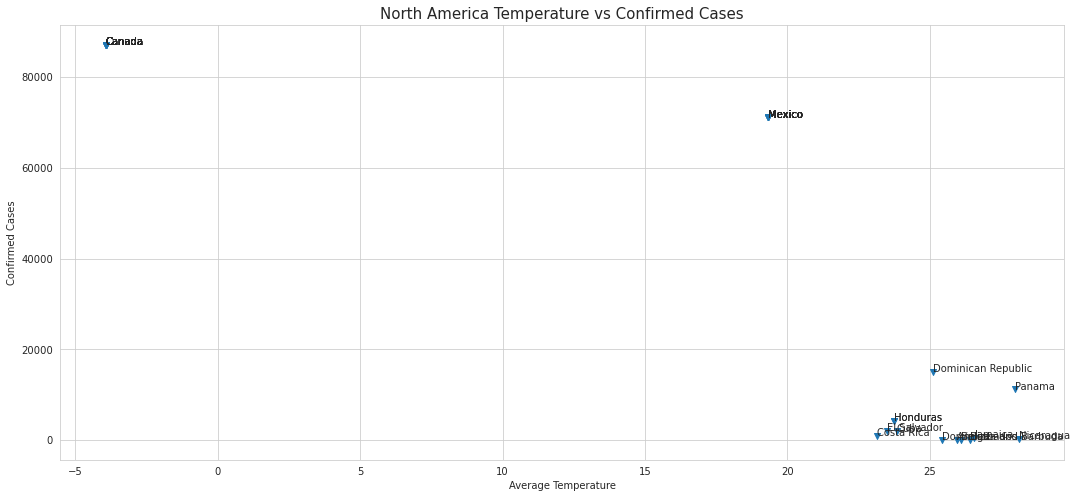

In [99]:
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(na_temp['Avg_temp'], na_temp['Confirmed'], marker='v')
plt.xlabel('Average Temperature')
plt.ylabel('Confirmed Cases')
plt.title('North America Temperature vs Confirmed Cases', fontsize=15)
for i, txt in zip(na_temp.index,na_temp.Country):
    ax.annotate(txt, (na_temp['Avg_temp'][i], na_temp['Confirmed'][i]),fontsize=10)

## Oceania

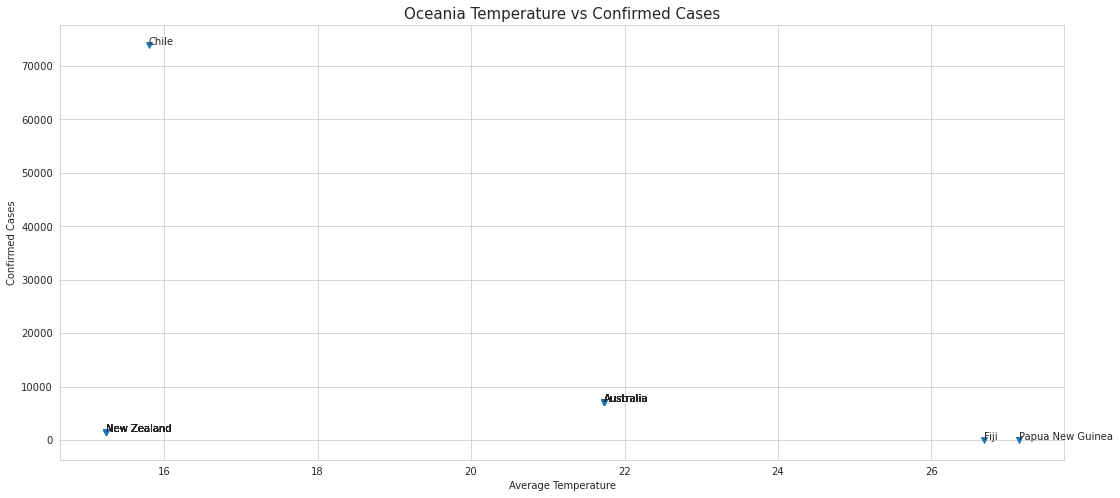

In [100]:
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(ocenia_temp['Avg_temp'], ocenia_temp['Confirmed'], marker='v')
plt.xlabel('Average Temperature')
plt.ylabel('Confirmed Cases')
plt.title('Oceania Temperature vs Confirmed Cases', fontsize=15)
for i, txt in zip(ocenia_temp.index,ocenia_temp.Country):
    ax.annotate(txt, (ocenia_temp['Avg_temp'][i], ocenia_temp['Confirmed'][i]),fontsize=10)

## South America

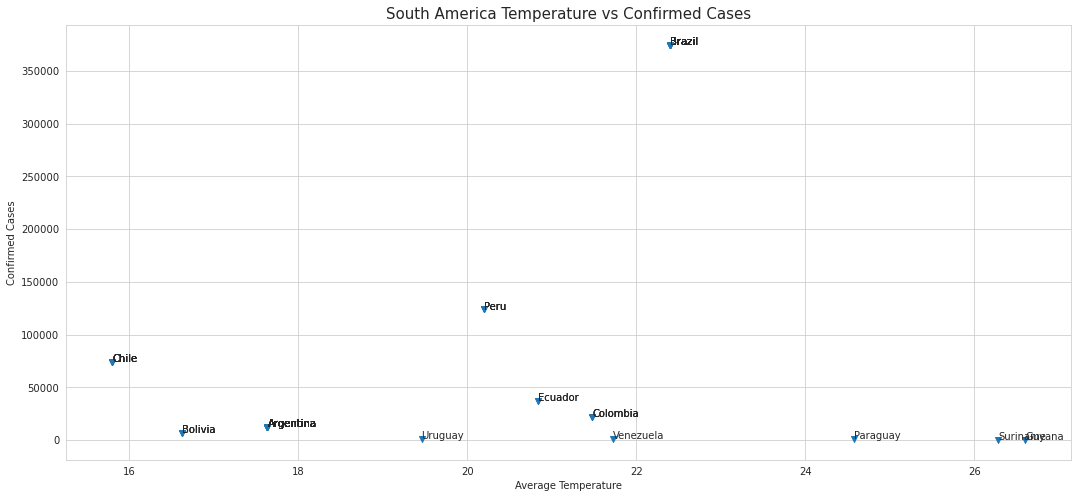

In [101]:
fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(sa_temp['Avg_temp'], sa_temp['Confirmed'], marker='v' )
plt.xlabel('Average Temperature')
plt.ylabel('Confirmed Cases')
plt.title('South America Temperature vs Confirmed Cases', fontsize=15)
for i, txt in zip(sa_temp.index,sa_temp.Country):
    ax.annotate(txt, (sa_temp['Avg_temp'][i], sa_temp['Confirmed'][i]),fontsize=10)

## Social Distancing for Indonesia

In [102]:
indonesia = complete[complete['Country/Region'] == 'Indonesia']

In [103]:
indonesia.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
132,NaN,Indonesia,-0.7893,113.9213,2020-01-22,0,0,0,0
397,NaN,Indonesia,-0.7893,113.9213,2020-01-23,0,0,0,0
662,NaN,Indonesia,-0.7893,113.9213,2020-01-24,0,0,0,0
927,NaN,Indonesia,-0.7893,113.9213,2020-01-25,0,0,0,0
1192,NaN,Indonesia,-0.7893,113.9213,2020-01-26,0,0,0,0


In [104]:
world_temp_2020[world_temp_2020['Country'] == 'Indonesia']

,Country,Jan,Feb,Mar,Apr,May,Avg_temp,Continent
127,Indonesia,26.1,26.1,26.4,27.0,27.2,26.56,Asia


In [105]:
# plot daily cases
colors = ['#FFA500']*85
colors[-5] = 'crimson'
fig = px.bar(indonesia, 
             x="Date", y="Confirmed", 
             title='<b>New Confirm Cases Per Day In Indonesia</b>', 
             orientation='v', 
             width=700, height=600)
fig.update_traces(marker_color=colors, opacity=0.8)

fig.add_annotation( # add a text callout with arrow
    text="Social Distancing", x='2020-04-10', y=indonesia.Confirmed.max(), arrowhead=1, showarrow=True
)

# fig.add_annotation( # add a text callout with arrow
#     text="Extended Lockdown", x='2020-04-14', y=1400, arrowhead=1, showarrow=True
# )
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0='2020-04-10',
            y0=0,
            x1='2020-04-10',
            y1=indonesia.Confirmed.max(),
            line=dict(
                color="RoyalBlue",
                width=1,
                dash="dashdot"
            )))


fig.update_layout(template = 'plotly_white',font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig.show()

### Effectiveness Social Distancing

In [106]:
gdp = pd.read_csv('/kaggle/input/covid19-different-mitigate-scenarios/GDP_Country.csv')
suppression = pd.read_csv('/kaggle/input/covid19-different-mitigate-scenarios/Suppression.csv')
mitigate = pd.read_csv("/kaggle/input/covid19-different-mitigate-scenarios/Mitigation_Type.csv")

In [107]:
mitigate[mitigate['Country'] == 'Indonesia']

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
1008,Indonesia,2.4,Enhanced social distancing of elderly,34%,273523621,145903545,419909,3635403,556681
1009,Indonesia,2.7,Enhanced social distancing of elderly,38%,273523621,158895807,478999,4020301,635202
1010,Indonesia,3.0,Enhanced social distancing of elderly,43%,273523621,167623842,653804,4659004,866911
1011,Indonesia,3.3,Enhanced social distancing of elderly,47%,273523621,175913029,711835,4959702,943646
1012,Indonesia,2.4,Social distancing whole population,37%,273523621,145288435,652399,4283278,864896
1013,Indonesia,2.7,Social distancing whole population,41%,273523621,157599592,712740,4658526,944856
1014,Indonesia,3.0,Social distancing whole population,45%,273523621,167576039,762192,4963320,1010387
1015,Indonesia,3.3,Social distancing whole population,48%,273523621,175835997,803521,5216086,1065749
1016,Indonesia,2.4,Unmitigated,0%,273523621,225134498,1056765,6722108,1400971
1017,Indonesia,2.7,Unmitigated,0%,273523621,236459937,1115925,7061387,1479645


## Predict Effectiveness distancing method in Indonesia based on Imperial College Journal

Total population in Indonesia is 273,277,935 based on https://www.worldometers.info/world-population/indonesia-population/
<t> Total hospital in Indonesia is 2,831 based on https://id.m.wikipedia.org/wiki/Daftar_rumah_sakit_di_Indonesia
<t> Indonesia R0 number is 2.5 based on https://katadata.co.id/berita/2020/05/28/rumus-r0-dan-rt-yang-jadi-acuan-jokowi-untuk-masuki-fase-new-normal

In [108]:
train = mitigate.drop('Social_distance',axis=1)
y = mitigate.Social_distance

In [109]:
total_infected = indonesia.iloc[-1,:].Confirmed
total_deaths = indonesia.iloc[-1,:].Deaths
total_critical = indonesia.iloc[-1,:].Active # In here I tried to change the total critical values into total Active
total_hospital = 2831
total_pop = 273277935
strategy = 'Social distancing whole population'
R0 = 2.5
row = ['Indonesia',R0,strategy,total_pop,total_infected, total_deaths,total_hospital,total_critical]
test = pd.DataFrame([row], columns= train.columns)
test.head()

,Country,R0,Strategy,total_pop,total_infected,total_deaths,total_hospital,total_critical
0,Indonesia,2.5,Social distancing whole population,273277935,22750,1391,2831,15717


In [110]:
merged = pd.concat([train,test])

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
merged['Strategy'] = encoder.fit_transform(merged['Strategy'])

In [112]:
train = merged.iloc[:len(train),]
test = merged.iloc[len(train):,]

In [113]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

In [114]:
X = train.drop('Country',axis=1)

In [118]:
X.head()

,R0,Strategy,total_pop,total_infected,total_deaths,total_hospital,total_critical
0,2.4,0,38928341,22235810,42015,342532,55701
1,2.7,0,38928341,24001697,46456,371943,61587
2,3.0,0,38928341,25058690,57529,414970,76266
3,3.3,0,38928341,26214010,60640,434649,80429
4,2.4,1,38928341,21576989,55929,378738,74147


In [119]:
target = list()
for i in y.str.split('%'):
    target.append(int(i[0]))

In [116]:
from sklearn.model_selection import cross_val_score
cross_val_score(regressor, X, target, cv=2)

array([0.99758805, 0.99793623])

In [117]:
test.drop('Country', axis=1,inplace=True)

In [ ]:
regressor.fit(X,target)
regressor.predict(test)

## References
- [COVID-19 - Temperature, Air Travel & Transmission ](https://www.kaggle.com/sixteenpython/covid-19-temperature-air-travel-transmission)
- [COVID-19 India: Analysis, Visualization, And Comparison](https://www.kaggle.com/vikassingh1996/indiafightscorona-covid-19-comprehensive-study)